<a href="https://colab.research.google.com/github/majadirks/nhs_teaching/blob/master/charlie_sheen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

On March 1, 2011, around 3pm, Charlie Sheen started a Twitter account. The math teacher Geoff Krall [decided to track how many followers he had](https://emergentmath.com/2011/03/03/can-you-predict-how-many-followers-charliesheen-has-right-now-exponential-growth-part-1/), because that's what math teachers do.


<img src="https://emergentmath.files.wordpress.com/2011/03/sheen2.png" alt="At 4:07 pm on 3/1/11, Charlie Sheen had 112497 followers." height="234" width="486"></img>

<img src="https://emergentmath.files.wordpress.com/2011/03/sheen141.png" alt="At 6:12 pm on 3/1/11, Charlie Sheen had 261894 followers.  He tweeted, 'Winning! Choose your Vice...'" height="234" width="486">


In [ ]:
#@title Press the "play" button to see how many Twitter followers Charlie Sheen had on March 1, 2011
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Headings
MINS_ELAPSED = "Minutes since 3pm"
FOLLOWERS = "Follower Count"

# Load data of how many followers Charlie Sheen had
# since starting his Twitter account in 2011
# Source: https://emergentmath.com/2011/03/03/can-you-predict-how-many-followers-charliesheen-has-right-now-exponential-growth-part-1/

datetimes_and_follower_counts=[
("2011-03-01 4:04 PM",109099),
("2011-03-01 4:07 PM",112497),
("2011-03-01 4:09 PM",116143),
("2011-03-01 4:12 PM",120195),
("2011-03-01 4:14 PM",122901),
("2011-03-01 4:18 PM",127643),
("2011-03-01 4:21 PM",129793),
("2011-03-01 4:24 PM",133357),
("2011-03-01 4:29 PM",140215),
("2011-03-01 4:32 PM",144103),
("2011-03-01 4:38 PM",149528),
("2011-03-01 4:44 PM",153848),
("2011-03-01 6:21 PM",261894),
("2011-03-01 6:24 PM",275638),
("2011-03-01 6:49 PM",302077),
("2011-03-01 7:13 PM",324595),
("2011-03-01 7:38 PM",348955),
("2011-03-01 8:45 PM",429904),
("2011-03-02 6:45 AM",729703),
("2011-03-02 8:51 AM",799008),
("2011-03-02 9:36 AM",820538),
("2011-03-02 10:23 AM",841940),
("2011-03-02 11:16 AM",865972),
("2011-03-02 12:43 PM",902291),
("2011-03-02 1:47 PM",926557),
("2011-03-02 3:09 PM",957259),
("2011-03-03 11:31 AM", 1297483),
("2011-03-04 9:43 AM", 1550073)
# As I write this code, @charliesheen has 10.5 million followers,
# but including that data point distorts the graph.
# ("2020-09-10 7:03 PM", 10500000)
]

# Parse out datetimes and follower counts
zipped_dts_and_fcs = list(zip(*datetimes_and_follower_counts))
# Parse datetime objects from strings
# dts = datetimes
dts=[datetime.strptime(x, '%Y-%m-%d %I:%M %p') for x in zipped_dts_and_fcs[0]]
fcs=zipped_dts_and_fcs[1] # follower counts
assert len(dts) == len(fcs) # Make sure we have the same number of each

# Store datetimes and follower counts in pandas Dataframe
follower_data = pd.DataFrame(data=fcs, # follower ocunts
                             index=dts, # datetimes
                             columns=[FOLLOWERS])
# Calculate minutes since 3pm on March 1st
start_time=datetime(2011, 3, 1, hour = 15, minute = 0)
minutes = (follower_data.index - start_time).total_seconds() / 60
follower_data[MINS_ELAPSED] = minutes
# Reorder columns
follower_data = follower_data[[MINS_ELAPSED, FOLLOWERS]]


# Create view for March 1 alone
march1 = follower_data.truncate(after='2011-03-02') # ie 3/1/11 only
print(march1)

# Graph the March 1 data
plt.plot(march1[MINS_ELAPSED], march1[FOLLOWERS], 'o')
plt.xlabel('Minutes since 3pm on 3/1/11')
plt.ylabel(FOLLOWERS)
plt.show()

1. What type of function would best fit this data? Would this data be best represented as a linear function / arithmetic sequence? Exponential function / geometric sequence? 

Mr. Krall stopped checking Twitter around 8:45 pm, and started again the next day at 6:45 am. (Because why not?) Press the "play" button to see the data from both days.

                     Minutes since 3pm  Follower Count
2011-03-01 16:04:00               64.0          109099
2011-03-01 16:07:00               67.0          112497
2011-03-01 16:09:00               69.0          116143
2011-03-01 16:12:00               72.0          120195
2011-03-01 16:14:00               74.0          122901
2011-03-01 16:18:00               78.0          127643
2011-03-01 16:21:00               81.0          129793
2011-03-01 16:24:00               84.0          133357
2011-03-01 16:29:00               89.0          140215
2011-03-01 16:32:00               92.0          144103
2011-03-01 16:38:00               98.0          149528
2011-03-01 16:44:00              104.0          153848
2011-03-01 18:21:00              201.0          261894
2011-03-01 18:24:00              204.0          275638
2011-03-01 18:49:00              229.0          302077
2011-03-01 19:13:00              253.0          324595
2011-03-01 19:38:00              278.0          348955
2011-03-01

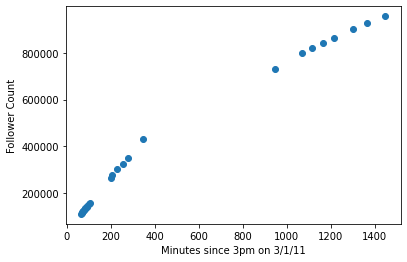

In [ ]:
#@title Press the "play" button to see how many Twitter followers Charlie Sheen had on March 1 and March 2, 2011

# Create view for both March 1 and March 2
march2 = follower_data.truncate(after='2011-03-03') # ie 3/1 and 3/2
#Display data for both days
print(march2)
# Graph all the data
plt.plot(march2[MINS_ELAPSED], march2[FOLLOWERS], 'o')
plt.xlabel('Minutes since 3pm on 3/1/11')
plt.ylabel(FOLLOWERS)
plt.show()

2. Now that we have more data, does your answer from question 1 still seem like the best type of function to model this data? Why or why not? If you answer has changed, how would you model this data now?

Mr. Krall later added two more data points: 

*   On March 3 at 11:31 AM, Charlie Sheen had 1,297,483 followers. 
*   On March 4 at 9:43 AM, Charlie Sheen had 1,550,073 followers



                     Minutes since 3pm  Follower Count
2011-03-01 16:04:00               64.0          109099
2011-03-01 16:07:00               67.0          112497
2011-03-01 16:09:00               69.0          116143
2011-03-01 16:12:00               72.0          120195
2011-03-01 16:14:00               74.0          122901
2011-03-01 16:18:00               78.0          127643
2011-03-01 16:21:00               81.0          129793
2011-03-01 16:24:00               84.0          133357
2011-03-01 16:29:00               89.0          140215
2011-03-01 16:32:00               92.0          144103
2011-03-01 16:38:00               98.0          149528
2011-03-01 16:44:00              104.0          153848
2011-03-01 18:21:00              201.0          261894
2011-03-01 18:24:00              204.0          275638
2011-03-01 18:49:00              229.0          302077
2011-03-01 19:13:00              253.0          324595
2011-03-01 19:38:00              278.0          348955
2011-03-01

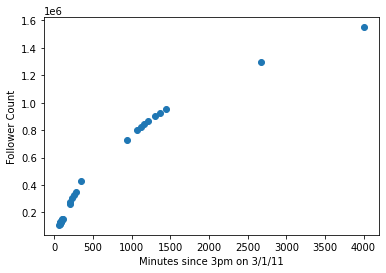

In [ ]:
#@title Press the "play" button to see how many Twitter followers Charlie Sheen had from March 1 to March 4, 2011

#Display data for all days
print(follower_data)
# Graph all the data
plt.plot(follower_data[MINS_ELAPSED], follower_data[FOLLOWERS], 'o')
plt.xlabel('Minutes since 3pm on 3/1/11')
plt.ylabel(FOLLOWERS)
plt.show()

3. Now that we have more data, does your answer from question 2 still seem like the best type of function to model this data? Why or why not? If you answer has changed, how would you model this data now?

It looks like, as time goes on, Charlie Sheen gains fewer followers per day. Let's analyze the **slope** of this line over time; that might help us predict where his follower count is heading!

Let's try to create a graph of  (Change-in-followers per minute) vs. (time).

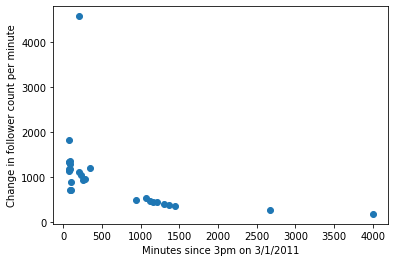

In [36]:
#@title Press the "Play" button to see how the slope (change-in-followers per minute) changes over time
DELTAS = "Change in Followers"
CHANGE_PER_MIN = "Change in Followers Per Minute"
# DELTAS = current follower count - previous follower count
follower_data[DELTAS] = follower_data[FOLLOWERS] -\
                         follower_data[FOLLOWERS].shift(1)
# CHANGE_PER_MIN = change in followers / minutes elapsed since last measurement
follower_data[CHANGE_PER_MIN] = follower_data[DELTAS].div(
    follower_data[MINS_ELAPSED] - follower_data[MINS_ELAPSED].shift(1))
# Plot the slopes
plt.plot(follower_data[MINS_ELAPSED],
         follower_data[CHANGE_PER_MIN],
         'o')
plt.xlabel("Minutes since 3pm on 3/1/2011")
plt.ylabel("Change in follower count per minute")
plt.show()

3. The y-values get smaller and smaller as time goes on. Why is that? Explain what this graph "means."

4. What type of function might we use to model this data?